<a href="https://colab.research.google.com/github/barbaradinizabreu/ICD-UFMG/blob/main/TP_ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 2 - Introdução à Ciência de Dados

## Integrantes
Bárbara Diniz Abreu - 2023001670  
Beatriz Camilly Gulart Pereira - 2023087753  
João Paulo Moura Furtado - 2023001891  
Caio Brega Có Silva - 2023070842  

## Perguntas
##### 1 - É possível prever o número de pessoas privadas de liberdade em um estado nos próximos anos a partir do histórico da população carcerária e da disponibilidade de vagas no sistema prisional?

##### 2 - A adoção das audiências de custódia, implementadas a partir de 2015, teve impacto significativo na redução da proporção de presos e presos provisórios no Brasil?

##### 3 - Existe uma correlação entre a infraestrutura prisional e a oferta de serviços nas unidades prisionais com o percentual de presos envolvidos em programas de laborterapia e educação?

##### 4 - Existe uma correlação entre o tipo de crime pelo qual os detentos foram condenados e a incidência de óbitos prisionais de natureza criminal?

##Banco de dados

O conjunto de dados utilizado neste trabalho é o **Levantamento Nacional de Informações Penitenciárias**, disponibilizado pela **Secretaria Nacional de Políticas Penais (SENAPPEN)**.

**Disponível em:** [SENAPPEN - Bases de Dados](https://www.gov.br/senappen/pt-br/servicos/sisdepen/bases-de-dados)


### Importação dos dados e bibliotecas

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import spearmanr

!gdown --folder https://drive.google.com/drive/folders/1lJmdpSd02WE6FaUpB8_lGBqRqEElGvaQ?usp=sharing --output .

dados = pd.read_csv('/content/sisdepen_1_17_csv.csv', encoding='utf-8', sep=';')

Retrieving folder contents
Processing file 1lwLd-VJJgsRyRuNEviTRyiSYN4uPwAMi sisdepen_1_17_csv.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1lwLd-VJJgsRyRuNEviTRyiSYN4uPwAMi
From (redirected): https://drive.google.com/uc?id=1lwLd-VJJgsRyRuNEviTRyiSYN4uPwAMi&confirm=t&uuid=55d381c6-994a-4d73-965b-06931d2ad318
To: /content/sisdepen_1_17_csv.csv
100% 125M/125M [00:01<00:00, 109MB/s]
Download completed


<ipython-input-28-207acf1bdd93>:11: DtypeWarning: Columns (37,129,131,188,223,390,1737,1740) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('/content/sisdepen_1_17_csv.csv', encoding='utf-8', sep=';')


In [ ]:
print(dados.head())

   ciclo   Ano Referência                  Tipo do Estabelecimento  \
0     17  2024     2024/2  Domiciliar com monitoramento eletrônico   
1     17  2024     2024/2  Domiciliar com monitoramento eletrônico   
2     17  2024     2024/2  Domiciliar com monitoramento eletrônico   
3     17  2024     2024/2  Domiciliar com monitoramento eletrônico   
4     17  2024     2024/2  Domiciliar com monitoramento eletrônico   

  Situação de Preenchimento      ID  \
0                  Validado  4410.0   
1                  Validado  5570.0   
2                  Validado  3581.0   
3                  Validado  3579.0   
4                  Validado  1841.0   

                             Nome do Estabelecimento  UF  \
0  NÚCLEO DE MONITORAMENTO ELETRONICO DOMICILIAR ...  AC   
1  NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...  AC   
2  NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...  AC   
3  NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...  AC   
4  UNIDADE DE MONITORAMENTO ELETRÔNICO DOMIC

In [ ]:
#apagar depois
dados.head()

,ciclo,Ano,Referência,Tipo do Estabelecimento,Situação de Preenchimento,ID,Nome do Estabelecimento,UF,Situação do Estabelecimento,Outras Denominações,...,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor secundár17,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor secundár18,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciário -,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciári19,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciári20,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciári21,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciári22,5.2 Quantidade de pessoas privadas de liberdade por cor de pele/raça/etnia | Outras | Masculino,5.2 Quantidade de pessoas privadas de liberdade por cor de pele/raça/etnia | Outras | Feminino,5.2 Quantidade de pessoas privadas de liberdade por cor de pele/raça/etnia | Outras | Total
0,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,4410.0,NÚCLEO DE MONITORAMENTO ELETRONICO DOMICILIAR ...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,5570.0,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,3581.0,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,3579.0,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,1841.0,UNIDADE DE MONITORAMENTO ELETRÔNICO DOMICILIAR...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variáveis que serão utilizadas (campo destinado somente para organização do tp)


Pergunta 1  
Serão utilizadas as colunas '1.3 Capacidade do estabelecimento' e as colunas '5.1. Quantidade de pessoas privadas de liberdade por faixa etária'

&nbsp;  
Pergunta 2  
Serão utilizadas as colunas começando em '2.4', as colunas '3.1' referentes a médicos e enfermeiros, '4.1 População prisional | Total' e por fim a coluna '6.8 Número de óbitos por doença'

&nbsp;  
Pergunta 3  
Existe uma correlação entre a falta de estrutura prisional (como superlotação e falta de recursos*) e a frequência de motins, rebeliões e outras formas de distúrbios internos?
  
&nbsp;  
Pergunta 4  
Serão utilizadas as colunas '6.8. Mortalidade no Sistema Prisional (total do período)' e as colunas '5.14 Quantidade de incidências por tipo penal'

### Limpeza dos Dados

O banco de dados possuía, inicialmente, 1782 colunas com informações sobre presídios de todo o Brasil.

Selecionando as colunas 'Situação de Preenchimento' e 'Situação do Estabelecimento' percebemos uma uniformidade. Dentre as respostas possíveis, todas foram 'validado' e 'ativo', respectivamente. Isso significa que as informações recolhidas via questionário por formulário foram preenchidas em totalidade e que todos os presídios registrados estão em operação.

Pensando nessa uniformidade, removemos essas colunas visto que elas não acrescentam informações relevantes que permitam a distinção entre os dados.


In [ ]:
def existe_uniformidade(dados, coluna, resposta_padrao):
    return (dados[coluna] == resposta_padrao).all()

print(existe_uniformidade(dados, 'Situação de Preenchimento', 'Validado'))
print(existe_uniformidade(dados, 'Situação do Estabelecimento', 'Ativo'))

True
True


As demais colunas retiradas foram removidas por não serem interessantes para a realização do nosso trabalho prático.

In [10]:
# Prefixos gerais para remoção
prefixos = [
    'Situação de Preenchimento',
    'Situação do Estabelecimento',
    'Outras Denominações',
    'Âmbito',
    'Município',
    'Endereço',
    'Bairro',
    'CEP',
    'Código IBGE',
    'Telefone Principal',
    '1.4 Gestão do estabelecimento',
    '1.5 Quais serviços são terceirizados?',
    '5.2 Quantidade de pessoas privadas de liberdade por cor de pele/raça/etnia',
    '5.3 Quantidade de pessoas privadas de liberdade por procedência',
    '5.4 Estado civil',
    '5.5 Pessoas com deficiência',
    '5.6 Quantidade de pessoas privadas de liberdade por grau de instrução',
    '5.7 Número de pessoas privadas de liberdade com documentos pessoais',
    '5.8 Quantidade de pessoas privadas de liberdade por nacionalidade',
    '5.9 Faixa etária dos filhos que estão no estabelecimento (aplicável apenas para estabelecimentos com mulheres)',
    '5.10 Número de filhos/as',
    '5.11 Número de pessoas privadas de liberdade que possuem visitantes cadastrados',
    '5.14 Quantidade de incidências por tipo penal | Número de pessoas privadas de liberdade com informação sobre tipificação criminal',
    '5.14 Quantidade de incidências por tipo penal | Número de pessoas privadas de liberdade sem informação sobre tipificação criminal',
    '7.3 Quantidade de visitas registradas no período de referência',
    '7.4. Total de apreensões no período de referência',
    '7.5 Foi realizada visita(s) de inspeção no período de referência?'
]

# Colunas específicas a serem removidas
colunas_especificas = [
    '1.1 Estabelecimento originalmente destinado a pessoa privadas de liberdade do sexo',
    '1.2 Tipo de estabelecimento - originalmente destinado',
    '1.8 Possui regimento interno?',
    '1.9 O regimento interno é específico para este estabelecimento ou se aplica aos demais estabelecimentos do Estado?',
    '1.6 Data de inauguração do estabelecimento',
    '1.7 O estabelecimento foi concebido como estabelecimento penal ou foi construído para outra utilização e foi adaptado?',
    '5.14 Quantidade de incidências por tipo penal | Masculino',
    '5.14 Quantidade de incidências por tipo penal | Feminino'
]

''''# Colunas que começam com '6', exceto as que começam com '6.8'
colunas_6 = [
    col for col in dados.columns
    if col.startswith('6') and not col.startswith('6.8')
]'''

colunas_por_prefixo = [
    col for col in dados.columns
    if any(col.startswith(pref) for pref in prefixos)
]

#colunas_para_remover = colunas_6 + colunas_por_prefixo + colunas_especificas
colunas_para_remover = colunas_por_prefixo + colunas_especificas
dados_filtrados = dados.drop(columns=colunas_para_remover)

# Substitui espaços vazios por 'NaN'
dados_filtrados = dados_filtrados.replace(r'^\s*$', np.nan, regex=True)# Prefixos gerais para remoção
prefixos = [
    'Situação de Preenchimento',
    'Situação do Estabelecimento',
    'Outras Denominações',
    'Âmbito',
    'Município',
    'Endereço',
    'Bairro',
    'CEP',
    'Código IBGE',
    'Telefone Principal',
    '1.4 Gestão do estabelecimento',
    '1.5 Quais serviços são terceirizados?',
    '5.2 Quantidade de pessoas privadas de liberdade por cor de pele/raça/etnia',
    '5.3 Quantidade de pessoas privadas de liberdade por procedência',
    '5.4 Estado civil',
    '5.5 Pessoas com deficiência',
    '5.6 Quantidade de pessoas privadas de liberdade por grau de instrução',
    '5.7 Número de pessoas privadas de liberdade com documentos pessoais',
    '5.8 Quantidade de pessoas privadas de liberdade por nacionalidade',
    '5.9 Faixa etária dos filhos que estão no estabelecimento (aplicável apenas para estabelecimentos com mulheres)',
    '5.10 Número de filhos/as',
    '5.11 Número de pessoas privadas de liberdade que possuem visitantes cadastrados',
    '5.14 Quantidade de incidências por tipo penal | Número de pessoas privadas de liberdade com informação sobre tipificação criminal',
    '5.14 Quantidade de incidências por tipo penal | Número de pessoas privadas de liberdade sem informação sobre tipificação criminal',
    '7.3 Quantidade de visitas registradas no período de referência',
    '7.4. Total de apreensões no período de referência',
    '7.5 Foi realizada visita(s) de inspeção no período de referência?'
]

# Colunas específicas a serem removidas
colunas_especificas = [
    '1.1 Estabelecimento originalmente destinado a pessoa privadas de liberdade do sexo',
    '1.2 Tipo de estabelecimento - originalmente destinado',
    '1.8 Possui regimento interno?',
    '1.9 O regimento interno é específico para este estabelecimento ou se aplica aos demais estabelecimentos do Estado?',
    '1.6 Data de inauguração do estabelecimento',
    '1.7 O estabelecimento foi concebido como estabelecimento penal ou foi construído para outra utilização e foi adaptado?',
    '5.14 Quantidade de incidências por tipo penal | Masculino',
    '5.14 Quantidade de incidências por tipo penal | Feminino'
]

''''# Colunas que começam com '6', exceto as que começam com '6.8'
colunas_6 = [
    col for col in dados.columns
    if col.startswith('6') and not col.startswith('6.8')
]'''

colunas_por_prefixo = [
    col for col in dados.columns
    if any(col.startswith(pref) for pref in prefixos)
]

#colunas_para_remover = colunas_6 + colunas_por_prefixo + colunas_especificas
colunas_para_remover = colunas_por_prefixo + colunas_especificas
dados_filtrados = dados.drop(columns=colunas_para_remover)

# Substitui espaços vazios por 'NaN'
dados_filtrados = dados_filtrados.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
for col in dados_filtrados.columns:
    print(f"'{col}'")

'ciclo'
'Ano'
'Referência'
'Tipo do Estabelecimento'
'ID'
'Nome do Estabelecimento'
'UF'
'1.3 Capacidade do estabelecimento | Presos provisórios | Masculino'
'1.3 Capacidade do estabelecimento | Presos provisórios | Feminino'
'1.3 Capacidade do estabelecimento | Presos provisórios | Total'
'1.3 Capacidade do estabelecimento | Regime fechado | Masculino'
'1.3 Capacidade do estabelecimento | Regime fechado | Feminino'
'1.3 Capacidade do estabelecimento | Regime fechado | Total'
'1.3 Capacidade do estabelecimento | Regime semiaberto | Masculino'
'1.3 Capacidade do estabelecimento | Regime semiaberto | Feminino'
'1.3 Capacidade do estabelecimento | Regime semiaberto | Total'
'1.3 Capacidade do estabelecimento | Regime aberto | Masculino'
'1.3 Capacidade do estabelecimento | Regime aberto | Feminino'
'1.3 Capacidade do estabelecimento | Regime aberto | Total'
'1.3 Capacidade do estabelecimento | Regime Disciplinar Diferenciado (RDD) | Masculino'
'1.3 Capacidade do estabelecimento | Regime D

In [ ]:
#apagar depos
dados_filtrados.head()

#para baixar o csv
dados_filtrados.to_csv('dadosfiltrageminicial.csv', index=True, header=True, sep=';', encoding='utf-8')

## Análise Exploratória dos Dados (EDA)

#### Pergunta 1
Para essa análise serão investigadas a evolução temporal da população carcerária por estado e a relação entre capacidade total de vagas e número total de presos


In [ ]:
colunas_usadas = [
    'Ano', 'UF',
    '1.3 Capacidade do estabelecimento | Presos provisórios | Total',
    '1.3 Capacidade do estabelecimento | Regime fechado | Total',
    '1.3 Capacidade do estabelecimento | Regime semiaberto | Total',
    '1.3 Capacidade do estabelecimento | Regime aberto | Total',
    '1.3 Capacidade do estabelecimento | Regime Disciplinar Diferenciado (RDD) | Total',
    '1.3 Capacidade do estabelecimento | Medidas de segurança de internação | Total',
    '1.3 Capacidade do estabelecimento | Outro(s). Qual(is)? | Total',
    '1.3 Capacidade do estabelecimento | Masculino | Total',
    '1.3 Capacidade do estabelecimento | Feminino | Total',
    '5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 18 a 24 anos | Total',
    '5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 25 a 29 anos | Total',
    '5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 30 a 34 anos | Total',
    '5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 35 a 45 anos | Total',
    '5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 46 a 60 anos | Total',
    '5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 61 a 70 anos | Total',
    '5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Mais de 70 anos | Total',
    '5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Não informado | Total',
    '5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Total'
]

dados_filtrados1 = dados_filtrados[colunas_usadas]
# Remove as linhas com todos os valores ausentes
dados_filtrados1 = dados_filtrados1.dropna(how='all')

for col in colunas_usadas[2:]:
    dados_filtrados1[col] = pd.to_numeric(dados_filtrados1[col], errors='coerce')

# Agrupa por ano e UF e soma os dados
df_uf_ano = dados_filtrados1.groupby(['Ano', 'UF']).sum().reset_index()
df_uf_ano.head(27)


,Ano,UF,1.3 Capacidade do estabelecimento | Presos provisórios | Total,1.3 Capacidade do estabelecimento | Regime fechado | Total,1.3 Capacidade do estabelecimento | Regime semiaberto | Total,1.3 Capacidade do estabelecimento | Regime aberto | Total,1.3 Capacidade do estabelecimento | Regime Disciplinar Diferenciado (RDD) | Total,1.3 Capacidade do estabelecimento | Medidas de segurança de internação | Total,1.3 Capacidade do estabelecimento | Outro(s). Qual(is)? | Total,1.3 Capacidade do estabelecimento | Masculino | Total,1.3 Capacidade do estabelecimento | Feminino | Total,5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 18 a 24 anos | Total,5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 25 a 29 anos | Total,5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 30 a 34 anos | Total,5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 35 a 45 anos | Total,5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 46 a 60 anos | Total,5.1 Quantidade de pessoas privadas de liberdade por faixa etária | 61 a 70 anos | Total,5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Mais de 70 anos | Total,5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Não informado | Total,5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Total
0,2016,AC,610.0,2218.0,1956.0,0.0,70.0,1.0,0.0,4296.0,559.0,1239.0,859.0,628.0,541.0,106.0,14.0,4.0,10.0,3401.0
1,2016,AL,760.0,1984.0,1.0,0.0,0.0,83.0,0.0,2609.0,219.0,2343.0,1868.0,1118.0,973.0,370.0,82.0,14.0,343.0,7111.0
2,2016,AM,2355.0,901.0,264.0,946.0,1.0,25.0,0.0,4123.0,369.0,3697.0,2371.0,1555.0,1398.0,377.0,41.0,2.0,201.0,9642.0
3,2016,AP,534.0,560.0,566.0,10.0,0.0,0.0,14.0,1581.0,103.0,732.0,738.0,504.0,581.0,132.0,7.0,1.0,9.0,2704.0
4,2016,BA,3082.0,771.0,946.0,0.0,432.0,90.0,5036.0,9885.0,472.0,4128.0,3018.0,2394.0,1860.0,701.0,222.0,16.0,184.0,12523.0
5,2016,CE,9553.0,3182.0,965.0,222.0,0.0,153.0,2.0,13319.0,758.0,6844.0,5403.0,4032.0,4681.0,1856.0,16.0,0.0,1179.0,24011.0
6,2016,DF,1744.0,3464.0,2064.0,0.0,0.0,123.0,0.0,6690.0,705.0,4242.0,3655.0,2847.0,3109.0,945.0,82.0,4.0,74.0,14958.0
7,2016,ES,5439.0,5428.0,2579.0,0.0,10.0,131.0,4.0,12296.0,1295.0,4837.0,2918.0,1977.0,2039.0,935.0,122.0,18.0,1725.0,14571.0
8,2016,GO,4243.0,3292.0,1284.0,531.0,133.0,4.0,66.0,8717.0,836.0,2987.0,2349.0,1457.0,1248.0,523.0,102.0,8.0,206.0,8880.0
9,2016,MA,3161.0,1508.0,800.0,106.0,5.0,1.0,12.0,5308.0,285.0,1944.0,1529.0,986.0,796.0,308.0,56.0,24.0,0.0,5643.0


**Gráficos para ilustrar o efeito das váriaveis independentes**



<ipython-input-10-fad938ab78ec>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_uf_ano, x='Ano', y='5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Total', ci=None)


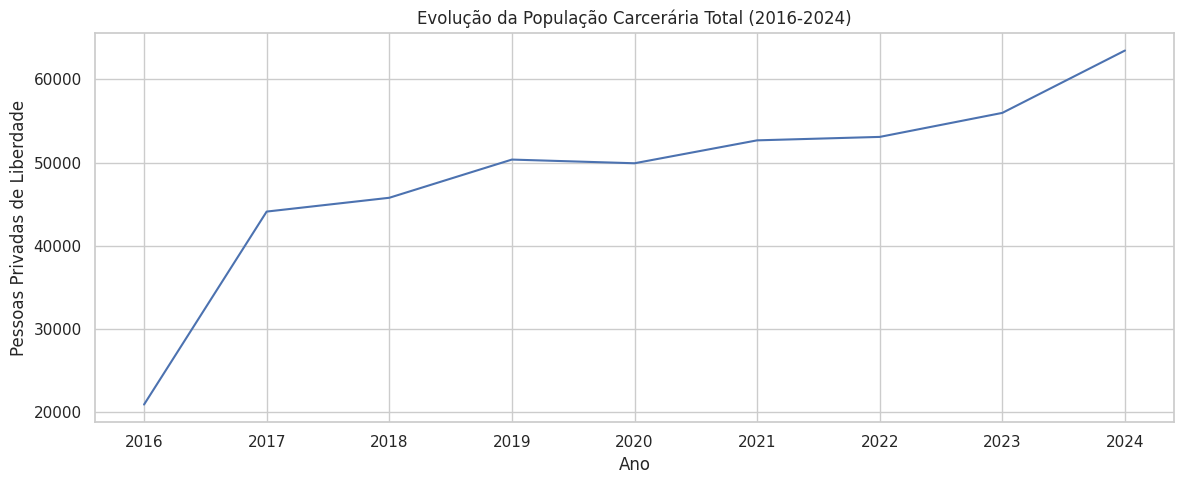

In [ ]:

sns.set(style='whitegrid')

# População carcerária total por ano
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_uf_ano, x='Ano', y='5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Total', ci=None)
plt.title('Evolução da População Carcerária Total (2016-2024)')
plt.xlabel('Ano')
plt.ylabel('Pessoas Privadas de Liberdade')
plt.tight_layout()
plt.show()

<ipython-input-11-442ad350f6aa>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_uf_ano, x='Ano', y='Capacidade Total', ci=None, label='Capacidade Total')
<ipython-input-11-442ad350f6aa>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_uf_ano, x='Ano', y='5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Total', ci=None, label='População Carcerária')


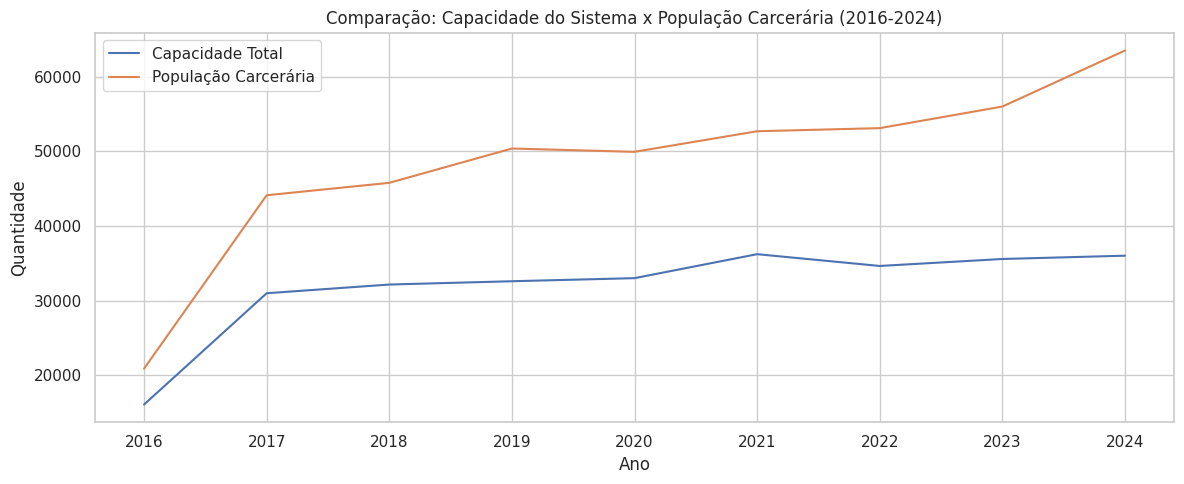

In [ ]:
# Capacidade total do sistema (somando todos os tipos de vagas disponíveis)
df_uf_ano['Capacidade Total'] = (
    df_uf_ano['1.3 Capacidade do estabelecimento | Presos provisórios | Total'] +
    df_uf_ano['1.3 Capacidade do estabelecimento | Regime fechado | Total'] +
    df_uf_ano['1.3 Capacidade do estabelecimento | Regime semiaberto | Total'] +
    df_uf_ano['1.3 Capacidade do estabelecimento | Regime aberto | Total'] +
    df_uf_ano['1.3 Capacidade do estabelecimento | Regime Disciplinar Diferenciado (RDD) | Total']
)

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_uf_ano, x='Ano', y='Capacidade Total', ci=None, label='Capacidade Total')
sns.lineplot(data=df_uf_ano, x='Ano', y='5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Total', ci=None, label='População Carcerária')
plt.title('Comparação: Capacidade do Sistema x População Carcerária (2016-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend()
plt.tight_layout()
plt.show()

#### Pergunta 2

- Limpeza e estruturação dos dados  


Primeiramente, a colunas de população prisional total foi transformada em numérica. A seguir, foi feita as montagems do grupo de colunas que diz respeito a estrutura hospitalar e do grupo de colunas da quantidade dos profissionais da área médica e de enfermagem presentes. Depois disso, foi calculado um "score" para cada prisão fazendo a soma total das estruturas e profissionais presentes dividido pelo número de presos. Por fim, foi feito a transformação da coluna de óbitos por motivos de saúde/naturais em numérica.

In [41]:
dfp2 = dados.copy()
dfp2.columns = dfp2.columns.str.strip()

dfp2['populacao_total'] = pd.to_numeric(dfp2['4.1 População prisional | Total'], errors='coerce')

#Montagem da coluna de estrutura hospitalar
colunas_estrutura = [col for col in dfp2.columns if col.startswith('2.4')]
dfp2[colunas_estrutura] = dfp2[colunas_estrutura].replace({'Sim': 1, 'Não': 0})
dfp2[colunas_estrutura] = dfp2[colunas_estrutura].apply(pd.to_numeric, errors='coerce')

dfp2['total_estrutura_saude'] = dfp2[colunas_estrutura].sum(axis=1)

#Montagem da coluna de profissionais da saúde
profissionais_prefixos = [
    '3.1 Quantidade de Servidores que atuam no Sistema Prisional | Médicos - clínicos gerais',
    '3.1 Quantidade de Servidores que atuam no Sistema Prisional | Médicos - ginecologistas',
    '3.1 Quantidade de Servidores que atuam no Sistema Prisional | Médicos - psiquiatras',
    '3.1 Quantidade de Servidores que atuam no Sistema Prisional | Médicos - outras especialidades',
    '3.1 Quantidade de Servidores que atuam no Sistema Prisional | Auxiliar e técnico de enfermagem',
    '3.1 Quantidade de Servidores que atuam no Sistema Prisional | Enfermeiros'
]

colunas_profissionais = [col for col in dfp2.columns if any(prof in col for prof in profissionais_prefixos)]
dfp2[colunas_profissionais] = dfp2[colunas_profissionais].apply(pd.to_numeric, errors='coerce')

#Cálculo do score de qualidade em saúde
dfp2['total_profissionais_saude'] = dfp2[colunas_profissionais].sum(axis=1)
dfp2['score_qualidade_saude'] = (dfp2['total_estrutura_saude'] + dfp2['total_profissionais_saude']) / (dfp2['4.1 População prisional | Total'])

dfp2['obitos_doenca'] = pd.to_numeric(dfp2['6.8 Mortalidade no Sistema Prisional (total do período) | Óbitos naturais/ óbitos por motivos de saúde | Total'], errors='coerce')
dfp2 = dfp2.dropna(subset=['score_qualidade_saude', 'obitos_doenca'])

<ipython-input-41-d3316a399911>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfp2[colunas_estrutura] = dfp2[colunas_estrutura].replace({'Sim': 1, 'Não': 0})


0        0.005025
1        0.005780
2        0.003058
3        0.002857
4        0.000599
           ...   
25719    0.590909
25725    0.031088
25732    0.097458
25733    0.200000
25734    0.055556
Name: score_qualidade_saude, Length: 16754, dtype: float64


<ipython-input-41-d3316a399911>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfp2['total_profissionais_saude'] = dfp2[colunas_profissionais].sum(axis=1)
<ipython-input-41-d3316a399911>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfp2['score_qualidade_saude'] = (dfp2['total_estrutura_saude'] + dfp2['total_profissionais_saude']) / (dfp2['4.1 População prisional | Total'])
<ipython-input-41-d3316a399911>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

- Cálculo da correlação utilizando spearman

In [30]:
cor, p_valor = spearmanr(dfp2['score_qualidade_saude'], dfp2['obitos_doenca'])
print("Correlação (Spearman):", cor)
print("Valor-p:", p_valor)

Correlação (Spearman): -0.206389751318159
Valor-p: 1.3352733497468027e-160


- Gráficos para demonstração

Dispersão

/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


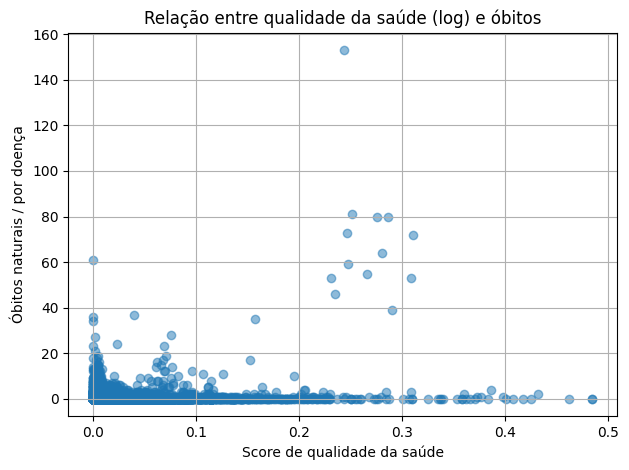

In [47]:
dfp2_plot = dfp2.copy()
dfp2_plot['score_qualidade_saude'] = np.log10(dfp2['score_qualidade_saude'] + 1)

sns.regplot(
    x='score_qualidade_saude',
    y='obitos_doenca',
    data=dfp2_plot,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'green'}
)

plt.xlabel('Score de qualidade da saúde')
plt.ylabel('Óbitos naturais / por doença')
plt.title('Relação entre qualidade da saúde (log) e óbitos')
plt.grid(True)
plt.tight_layout()
plt.show()

Boxplot comparando Scores de qualidade hospitalar

<ipython-input-46-90bfb33a1d90>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grupo Qualidade', y='obitos_doenca', data=dfp2_plot, palette='Set2')


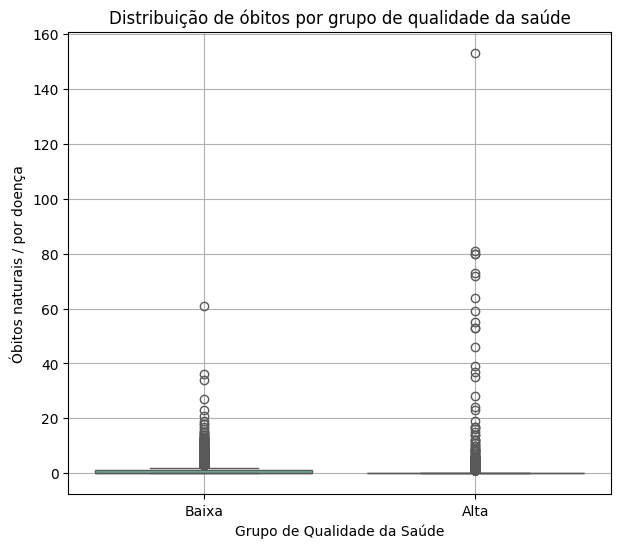

In [46]:
mediana = dfp2_plot['score_qualidade_saude'].median()
dfp2['Grupo Qualidade'] = ['Baixa' if x <= mediana else 'Alta' for x in dfp2_plot['score_qualidade_saude']]

plt.figure(figsize=(7, 6))
sns.boxplot(x='Grupo Qualidade', y='obitos_doenca', data=dfp2_plot, palette='Set2')
plt.title('Distribuição de óbitos por grupo de qualidade da saúde')
plt.xlabel('Grupo de Qualidade da Saúde')
plt.ylabel('Óbitos naturais / por doença')
plt.grid(True)
plt.show()

#### Pergunta 3

#### Pergunta 4
- Limpeza e estruturação dos dados  


Inicialmente, selecionamos as variáveis relevantes: número de detentos por tipo penal, total de óbitos criminais por unidade e população prisional total. Para garantir a integridade, espaços em branco foram convertidos para valores ausentes (NaN).

In [ ]:
coluna_populacao_prisional = ['4.1 População prisional | Total']

# Coluna com a variável-alvo: óbitos criminais
mortalidade_criminal = [
    '6.8 Mortalidade no Sistema Prisional (total do período) | Óbitos criminais | Total'
]

# Palavra-chave para identificar colunas com incidência de crimes
crimes = [
    '5.14 Quantidade de incidências por tipo penal'
]

# Seleciona apenas as colunas de crimes totais por tipo penal
colunas_crimes = [
    col for col in dados_filtrados.columns
    if '5.14' in col and 'Total' in col and any(tipo in col for tipo in crimes)
]

# Seleciona apenas as colunas relevantes: crimes, óbitos e população prisional
colunas_selecionadas = colunas_crimes + mortalidade_criminal + coluna_populacao_prisional
dados_filtrados4 = dados_filtrados[colunas_selecionadas]

# Substitui espaços em branco por NaN para normalizar os dados ausentes
dados_filtrados4 = dados_filtrados4.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Renomeação das colunas
dados_filtrados4_renomeados = dados_filtrados4.copy()
dados_filtrados4_renomeados.columns = [
    'Populacao_Prisional',
    'Pessoa_Homicidio_Simples',
    'Pessoa_Homicidio_Culposo',
    'Pessoa_Homicidio_Qualificado',
    'Pessoa_Aborto',
    'Pessoa_Lesao_Corporal',
    'Pessoa_Violencia_Domestica',
    'Pessoa_Sequestro_Carcere',
    'Pessoa_Outros_122_154A',

    'Patrimonio_Furto_Simples',
    'Patrimonio_Furto_Qualificado',
    'Patrimonio_Roubo_Simples',
    'Patrimonio_Roubo_Qualificado',
    'Patrimonio_Latrocinio',
    'Patrimonio_Extorsao',
    'Patrimonio_Extorsao_Sequestro',
    'Patrimonio_Apropriacao_Indebita',
    'Patrimonio_Apropriacao_Previdenciaria',
    'Patrimonio_Estelionato',
    'Patrimonio_Receptacao',
    'Patrimonio_Receptacao_Qualificada',
    'Patrimonio_Outros_156_179',

    'Sexual_Estupro',
    'Sexual_Atentado_Violento_Pudor',
    'Sexual_Estupro_Vulneravel',
    'Sexual_Corrupcao_Menores',
    'Sexual_Trafico_Internacional',
    'Sexual_Trafico_Interno',
    'Sexual_Outros',

    'PazPublica_Quadrilha_Bando',

    'FePublica_Moeda_Falsa',
    'FePublica_Falsificacao_Documentos',
    'FePublica_Falsidade_Ideologica',
    'FePublica_Uso_Documento_Falso',

    'AdmPublica_Peculato',
    'AdmPublica_Concussao_Exacao',
    'AdmPublica_Corrupcao_Passiva',

    'Particular_Corrupcao_Ativa',
    'Particular_Contrabando_Descaminho',

    'Drogas_Trafico',
    'Drogas_Associacao_Trafico',
    'Drogas_Trafico_Internacional',

    'Armas_Porte_Ilegal_Permitido',
    'Armas_Disparo',
    'Armas_Porte_Ilegal_Restrito',
    'Armas_Comercio_Ilegal',
    'Armas_Trafico_Internacional',

    'Transito_Homicidio_Culposo',

    'LegEspecifica_Outros_303_312',
    'LegEspecifica_ECA_Lei_8.069',
    'LegEspecifica_Genocidio',
    'LegEspecifica_Tortura',
    'LegEspecifica_MeioAmbiente',
    'LegEspecifica_ECA_Lei_869',

    'Obitos_Criminais_Total'
]

In [ ]:
print(dados_filtrados4_renomeados.head(15))

    Populacao_Prisional  Pessoa_Homicidio_Simples  Pessoa_Homicidio_Culposo  \
0                   NaN                       NaN                       NaN   
1                   NaN                       NaN                       NaN   
2                   NaN                       NaN                       NaN   
3                   NaN                       NaN                       NaN   
4                 109.0                       0.0                     180.0   
5                  60.0                       2.0                     200.0   
6                   4.0                       0.0                      26.0   
7                  39.0                       NaN                     188.0   
8                  12.0                       0.0                       0.0   
9                   NaN                       NaN                       NaN   
10                 85.0                       0.0                     160.0   
11                  NaN                       NaN   

In [ ]:
# Calcula a porcentagem de valores NaN em cada coluna
nan_percent = dados_filtrados4_renomeados.isna().mean()

# Exibe as colunas ordenadas pela porcentagem de NaNs de forma descrescente
print(nan_percent.sort_values(ascending=False))

LegEspecifica_MeioAmbiente               0.827531
LegEspecifica_Outros_303_312             0.782850
LegEspecifica_ECA_Lei_8.069              0.727290
AdmPublica_Peculato                      0.714547
Sexual_Trafico_Internacional             0.706698
AdmPublica_Concussao_Exacao              0.706387
Sexual_Corrupcao_Menores                 0.703979
Particular_Corrupcao_Ativa               0.703357
Armas_Comercio_Ilegal                    0.697140
Armas_Trafico_Internacional              0.694887
LegEspecifica_Tortura                    0.694343
Armas_Porte_Ilegal_Restrito              0.690730
Patrimonio_Apropriacao_Indebita          0.689098
Pessoa_Homicidio_Qualificado             0.679307
LegEspecifica_Genocidio                  0.675694
AdmPublica_Corrupcao_Passiva             0.672002
PazPublica_Quadrilha_Bando               0.668039
FePublica_Uso_Documento_Falso            0.661162
FePublica_Moeda_Falsa                    0.658909
Sexual_Estupro_Vulneravel                0.656733


In [ ]:
# Mantém apenas colunas com até 70% de NaN
colunas_validas = nan_percent[nan_percent <= 0.7].index
dados_filtrados4_renomeados = dados_filtrados4_renomeados[colunas_validas]

# Atualiza a lista de colunas de crimes com as que permaneceram
colunas_crimes = [col for col in dados_filtrados4_renomeados.columns if (col != 'Obitos_Criminais_Total' and col != 'Populacao_Prisional')]

# Atualiza a lista com a coluna de óbitos após a renomeação
mortalidade_criminal = ['Obitos_Criminais_Total']


In [ ]:
print(dados_filtrados4_renomeados.shape)
print("Qtd de linhas completamente nulas:", (dados_filtrados4_renomeados.isna().sum(axis=1) == 46).sum())

(25738, 47)
Qtd de linhas completamente nulas: 4834


In [ ]:
# Remove linhas completamente nulas (com NaN)
dados_filtrados4_renomeados = dados_filtrados4_renomeados.dropna(how='all')

# Remove linhas onde todos os crimes são NaN
dados_filtrados4_renomeados = dados_filtrados4_renomeados.dropna(
    subset=colunas_crimes, how='all'
)

print(dados_filtrados4_renomeados.shape)

(20898, 47)


As variáveis relacionadas ao tipo de crime são discretas e representam o número de registros por categoria em cada unidade prisional. Como que a presença de valores ausentes sugere a ausência do crime em questão, devido há alta quantidade de dados NaN em cada coluna utilizada,  optamos por preencher esses valores com zero para evitar distorções estatísticas.

In [ ]:
# Substitui NaNs restantes por 0.0
dados_filtrados4_renomeados = dados_filtrados4_renomeados.fillna(0.0)

In [ ]:
# Mantém apenas unidades com população prisional > 0 (evita divisão por zero)
dados_filtrados4_renomeados = dados_filtrados4_renomeados[dados_filtrados4_renomeados['Populacao_Prisional'] > 0]

# Cria colunas com proporção de cada crime por preso
for col in colunas_crimes:
    dados_filtrados4_renomeados[f'{col}_por_preso'] = (
        dados_filtrados4_renomeados[col] / dados_filtrados4_renomeados['Populacao_Prisional']
    )

# Cria a coluna com a proporção de óbitos criminais por preso
dados_filtrados4_renomeados['Obitos_Criminais_Total_por_preso'] = (
    dados_filtrados4_renomeados['Obitos_Criminais_Total'] / dados_filtrados4_renomeados['Populacao_Prisional']
)

- Estatísticas

In [ ]:
# Seleciona todas as colunas que representam proporções por preso
colunas_proporcionais_geral = [
    col for col in dados_filtrados4_renomeados.columns
    if col.endswith('_por_preso')
]

# Gera estatísticas descritivas dessas colunas
estatisticas = dados_filtrados4_renomeados[colunas_proporcionais_geral].describe()
print(estatisticas)

       Pessoa_Homicidio_Simples_por_preso  Pessoa_Homicidio_Culposo_por_preso  \
count                        13930.000000                        13930.000000   
mean                             0.159486                            3.025951   
std                              1.020757                           11.676003   
min                              0.000000                            0.000000   
25%                              0.000000                            0.166667   
50%                              0.000000                            1.000000   
75%                              0.000000                            3.000000   
max                             54.000000                          744.057143   

       Pessoa_Homicidio_Qualificado_por_preso  Pessoa_Aborto_por_preso  \
count                            13930.000000             13930.000000   
mean                                 0.010468                 0.381062   
std                                  0.180345   

- Distribuições

**Distribuição das proporções de tipos penais por preso**   
Como muitos tipos de crime apresentaram proporções concentradas em torno de zero e dada a grande quantidade de categorias penais analisadas, optamos por utilizar o *violin plot* para representar a distribuição de cada tipo penal. Para lidar com a alta concentração de valores baixos, utilizamos também uma escala logarítmica no eixo x, o que contribui para melhorar a visualização das diferenças entre os crimes.  
Obs.: O Seaborn não consegue estimar uma distribuição quando a variável possui apenas um valor único. Nesses casos, o violin plot não é gerado, e a categoria correspondente é automaticamente desconsiderada da visualização.

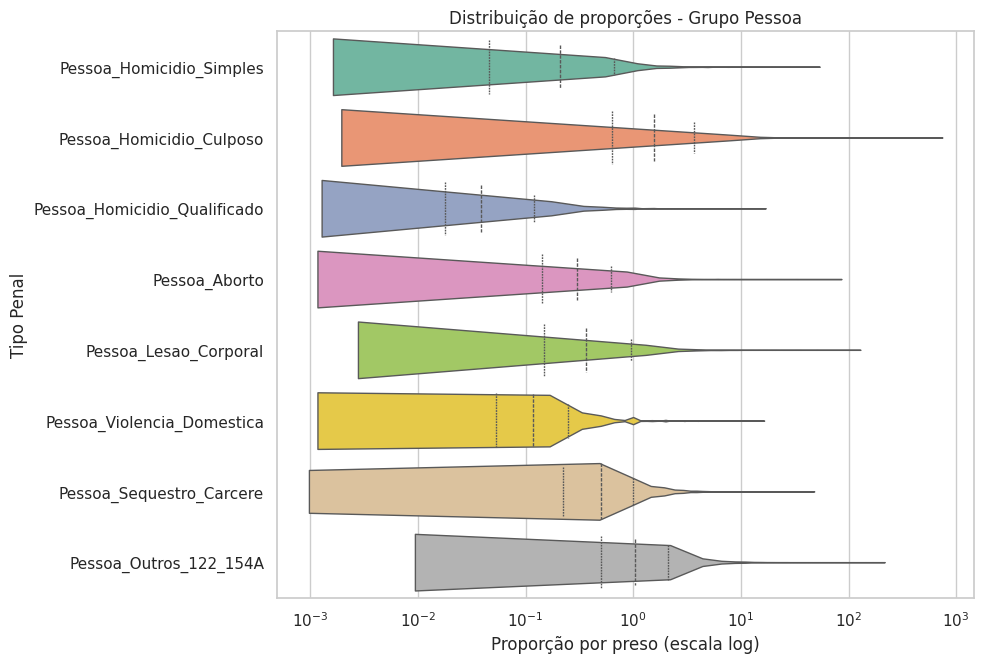

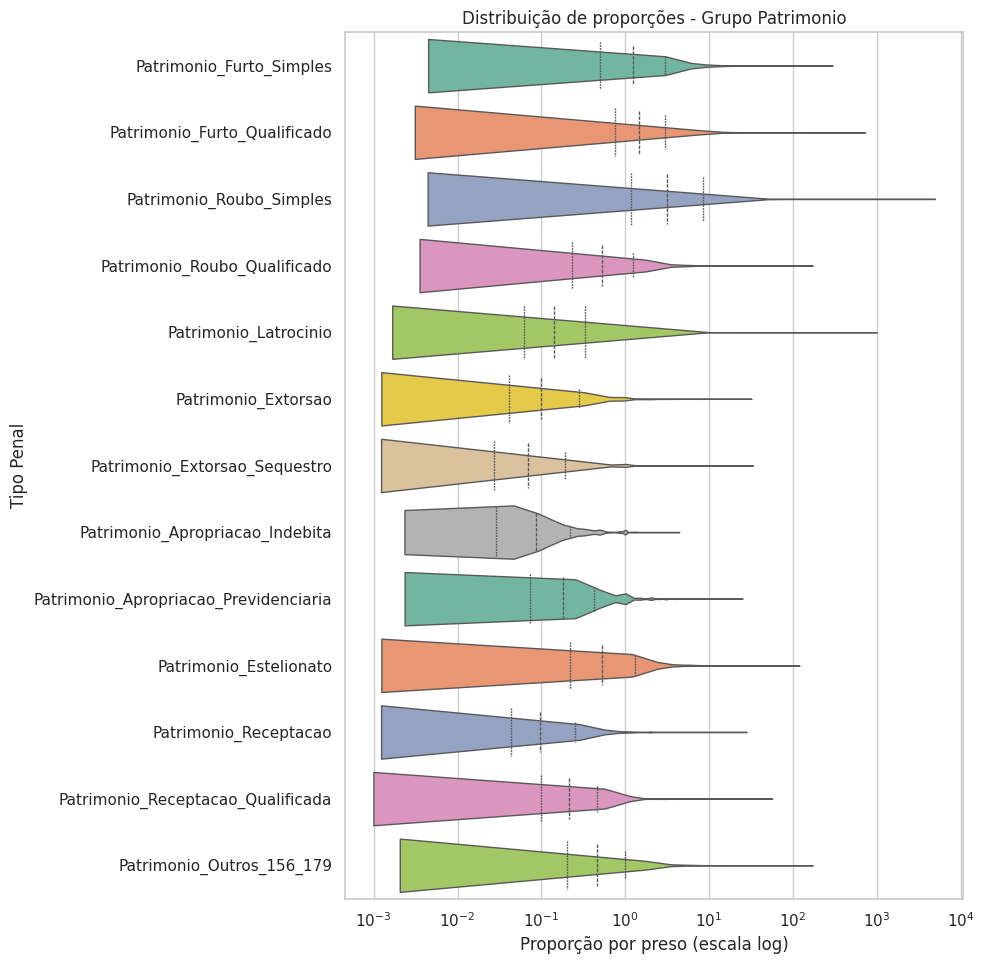

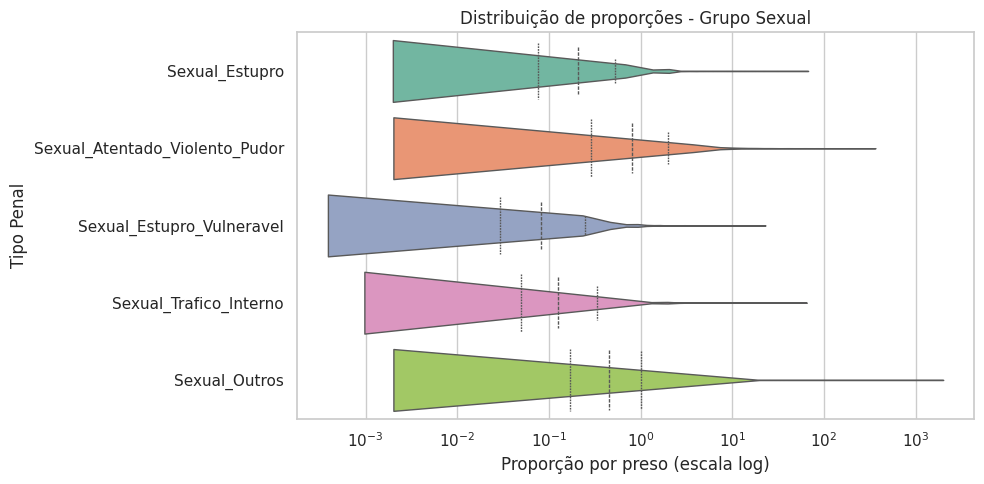

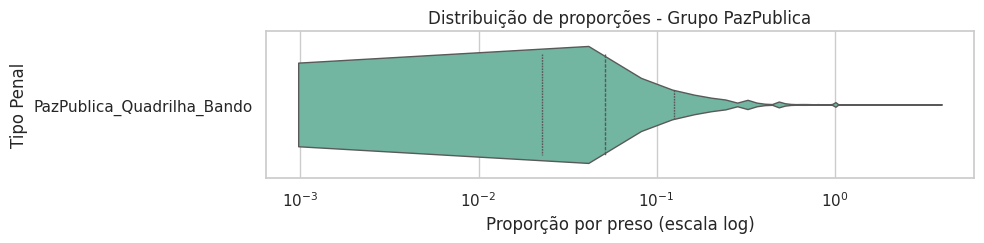

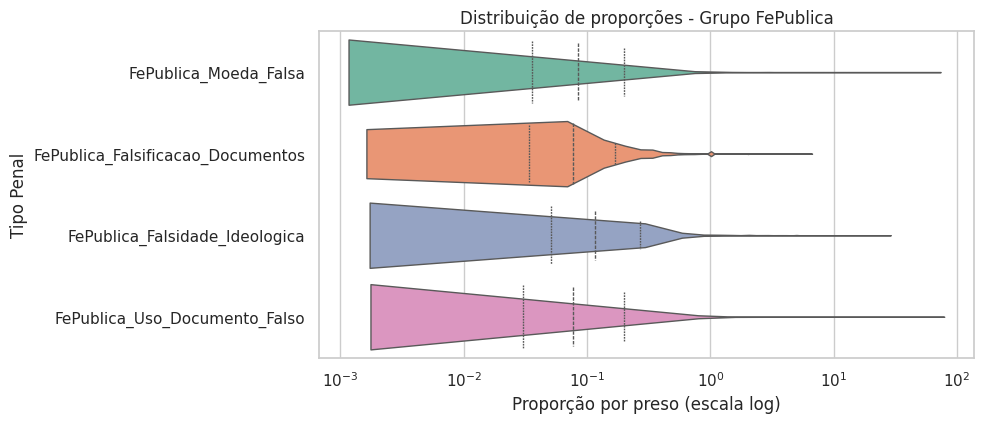

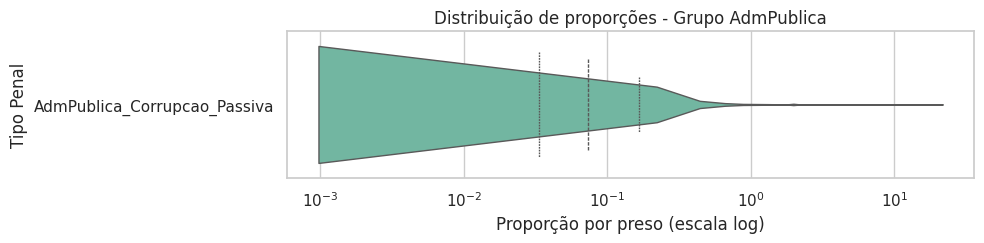

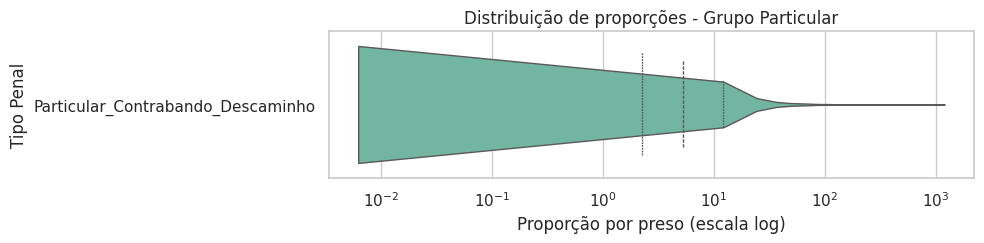

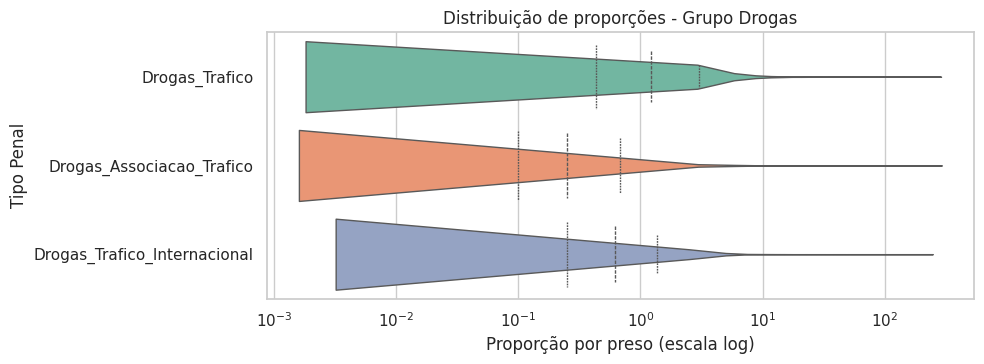

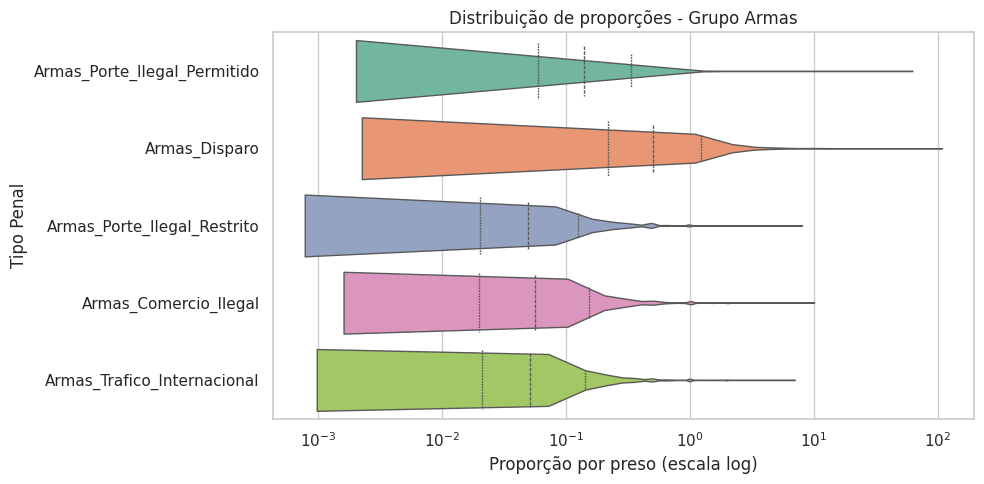

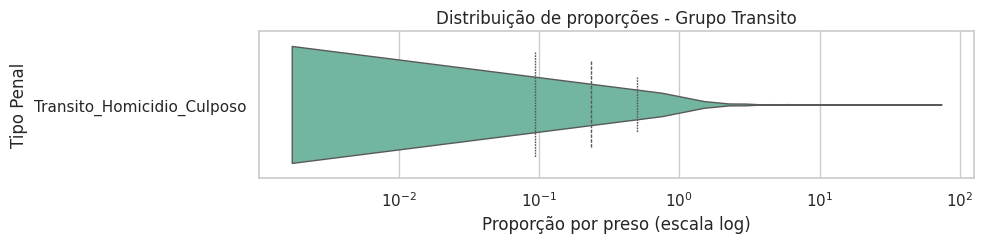

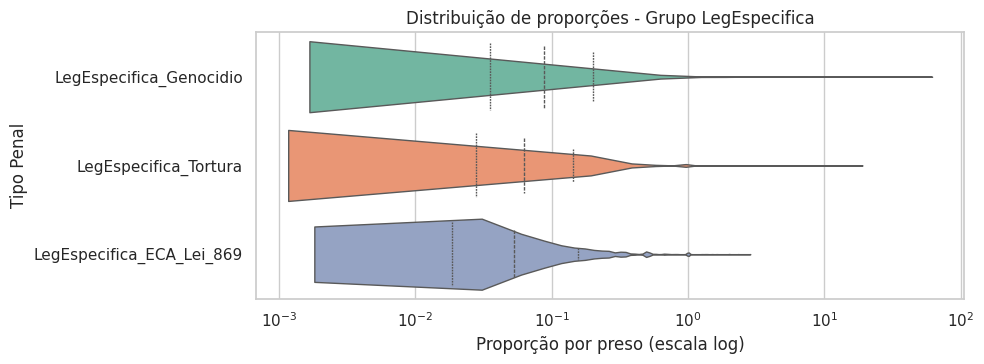

In [ ]:
# Seleciona todas as colunas proporcionais por preso, exceto a de óbitos
# (estamos interessados em analisar apenas os tipos penais proporcionais nesse momento)
colunas_proporcionais = [
    col for col in dados_filtrados4_renomeados.columns
    if col.endswith('_por_preso') and col != 'Obitos_Criminais_Total_por_preso'
]

# Extrai o nome base dos tipos penais para facilitar a separação em grupos
colunas_base_proporcionais = {
    col.replace('_por_preso', '') for col in colunas_proporcionais
}

# Separar em grupos para melhorar a visualização
grupos_crimes = {
    'Pessoa': [
        'Pessoa_Homicidio_Simples', 'Pessoa_Homicidio_Culposo', 'Pessoa_Homicidio_Qualificado',
        'Pessoa_Aborto', 'Pessoa_Lesao_Corporal', 'Pessoa_Violencia_Domestica',
        'Pessoa_Sequestro_Carcere', 'Pessoa_Outros_122_154A'
    ],
    'Patrimonio': [
        'Patrimonio_Furto_Simples', 'Patrimonio_Furto_Qualificado', 'Patrimonio_Roubo_Simples',
        'Patrimonio_Roubo_Qualificado', 'Patrimonio_Latrocinio', 'Patrimonio_Extorsao',
        'Patrimonio_Extorsao_Sequestro', 'Patrimonio_Apropriacao_Indebita',
        'Patrimonio_Apropriacao_Previdenciaria', 'Patrimonio_Estelionato',
        'Patrimonio_Receptacao', 'Patrimonio_Receptacao_Qualificada',
        'Patrimonio_Outros_156_179'
    ],
    'Sexual': [
        'Sexual_Estupro', 'Sexual_Atentado_Violento_Pudor', 'Sexual_Estupro_Vulneravel',
        'Sexual_Corrupcao_Menores', 'Sexual_Trafico_Internacional',
        'Sexual_Trafico_Interno', 'Sexual_Outros'
    ],
    'PazPublica': ['PazPublica_Quadrilha_Bando'],
    'FePublica': [
        'FePublica_Moeda_Falsa', 'FePublica_Falsificacao_Documentos',
        'FePublica_Falsidade_Ideologica', 'FePublica_Uso_Documento_Falso'
    ],
    'AdmPublica': [
        'AdmPublica_Peculato', 'AdmPublica_Concussao_Exacao', 'AdmPublica_Corrupcao_Passiva'
    ],
    'Particular': ['Particular_Corrupcao_Ativa', 'Particular_Contrabando_Descaminho'],
    'Drogas': [
        'Drogas_Trafico', 'Drogas_Associacao_Trafico', 'Drogas_Trafico_Internacional'
    ],
    'Armas': [
        'Armas_Porte_Ilegal_Permitido', 'Armas_Disparo', 'Armas_Porte_Ilegal_Restrito',
        'Armas_Comercio_Ilegal', 'Armas_Trafico_Internacional'
    ],
    'Transito': ['Transito_Homicidio_Culposo'],
    'LegEspecifica': [
        'LegEspecifica_Outros_303_312', 'LegEspecifica_ECA_Lei_8.069',
        'LegEspecifica_Genocidio', 'LegEspecifica_Tortura', 'LegEspecifica_MeioAmbiente',
        'LegEspecifica_ECA_Lei_869'
    ]
}

# Filtra apenas os crimes que existem nos dados
grupos_crimes_filtrados = {
    grupo: [crime for crime in crimes if crime in colunas_base_proporcionais]
    for grupo, crimes in grupos_crimes.items()
}

# Gera plots individuais para cada grupo
for grupo, colunas_base in grupos_crimes_filtrados.items():
    dados_violin = []

    for col_base in colunas_base:
        col = col_base + '_por_preso'
        if (
            col in dados_filtrados4_renomeados.columns and
            dados_filtrados4_renomeados[col].sum() > 0
        ):
            dados = dados_filtrados4_renomeados[col]
            dados = dados[dados > 1e-5]
            for valor in dados:
                dados_violin.append({
                    'Tipo Penal': col_base,
                    'Proporcao_por_preso': valor
                })

    df_violin = pd.DataFrame(dados_violin)

    if not df_violin.empty:
        plt.figure(figsize=(10, 0.6 * len(colunas_base) + 2))
        sns.violinplot(
            data=df_violin,
            y='Tipo Penal',
            x='Proporcao_por_preso',
            hue='Tipo Penal',
            legend=False,
            density_norm='width',
            inner='quartile',
            bw_adjust=0.3,
            cut=0,
            linewidth=1,
            palette='Set2'
        )
        plt.xscale('log')
        plt.xlabel('Proporção por preso (escala log)')
        plt.ylabel('Tipo Penal')
        plt.title(f'Distribuição de proporções - Grupo {grupo}')
        plt.tight_layout()
        plt.show()

**Distribuição dos óbitos criminais proporcionais à população prisional**

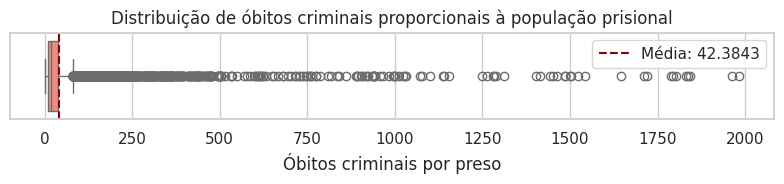

In [ ]:
# Boxplot dos óbitos criminais por preso
plt.figure(figsize=(8, 2))
sns.boxplot(
    data=dados_filtrados4_renomeados,
    x='Obitos_Criminais_Total_por_preso',
    color='salmon'
)
media_obitos = dados_filtrados4_renomeados['Obitos_Criminais_Total_por_preso'].mean()
plt.axvline(media_obitos, color='darkred', linestyle='--', label=f'Média: {media_obitos:.4f}')
plt.title('Distribuição de óbitos criminais proporcionais à população prisional')
plt.xlabel('Óbitos criminais por preso')
plt.legend()
plt.tight_layout()
plt.show()

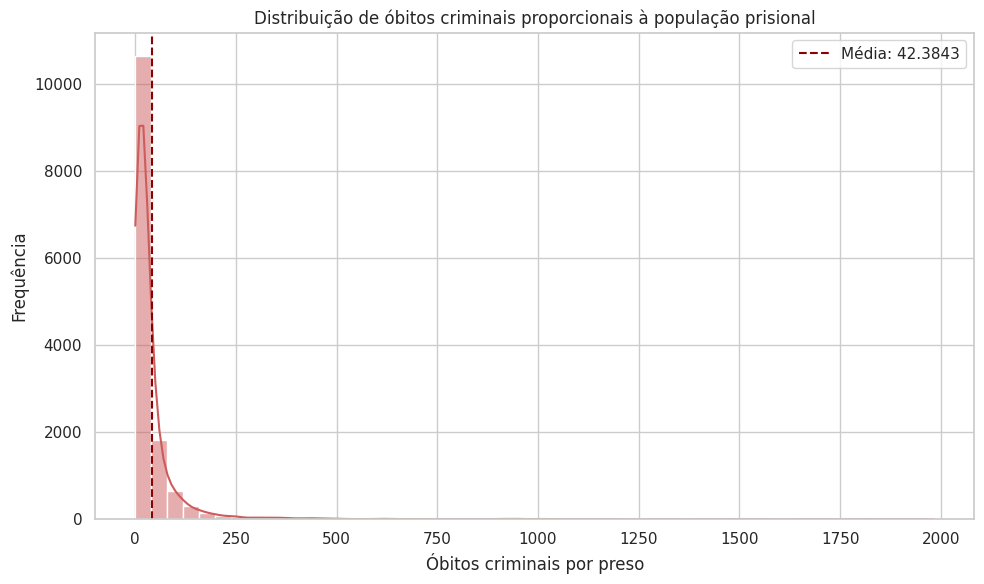

In [ ]:
# Histograma com KDE para óbitos por preso
plt.figure(figsize=(10, 6))
sns.histplot(
    data=dados_filtrados4_renomeados,
    x='Obitos_Criminais_Total_por_preso',
    kde=True,
    color='indianred',
    bins=50
)
plt.axvline(media_obitos, color='darkred', linestyle='--', label=f'Média: {media_obitos:.4f}')
plt.title('Distribuição de óbitos criminais proporcionais à população prisional')
plt.xlabel('Óbitos criminais por preso')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

Como mostram as figuras acima, a maior parte das observações está concentrada em valores baixos, enquanto há uma cauda longa à direita, o que indica a presença de outliers. Logo a distribuição é assimetricamente positiva.

- Correlações entre crimes e óbitos criminais

Para investigar a relação entre os tipos de crime pelos quais os detentos foram condenados e a incidência de óbitos de natureza criminal, optou-se pelo uso do coeficiente de Spearman dado que as variáveis em análise (proporções de presos por crime e óbitos criminais por preso) não seguem distribuição normal.

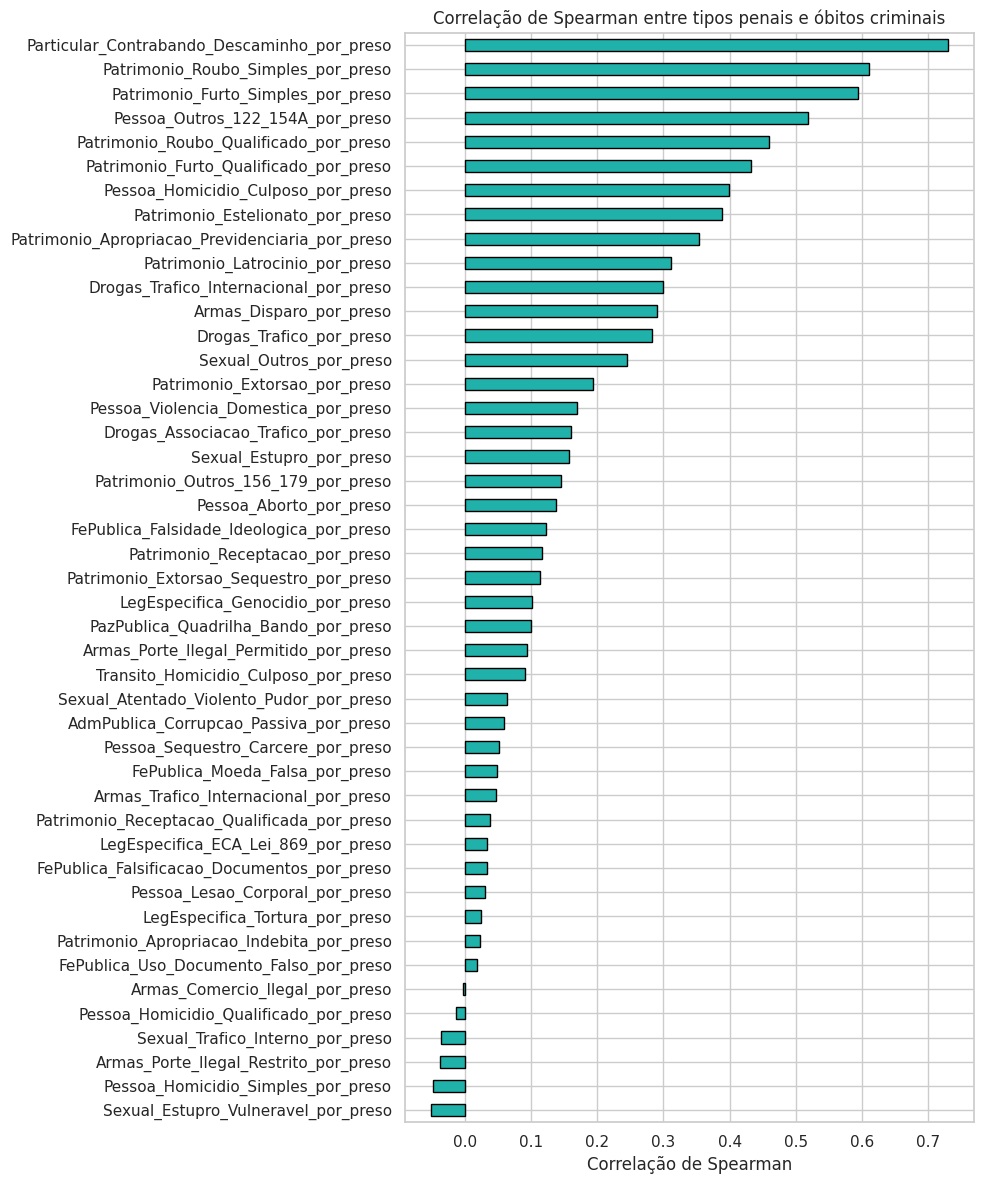

In [ ]:
# Lista de colunas com dados proporcionais de crimes, removendo a coluna relacionada ao óbito criminais por preso
colunas_proporcionais = [
    col for col in colunas_proporcionais
    if col != 'Obitos_Criminais_Total_por_preso'
]

# Calcula correlações de Spearman
spearman_corr = dados_filtrados4_renomeados[colunas_proporcionais + ['Obitos_Criminais_Total_por_preso']].corr(method='spearman')

# Seleciona apenas a coluna de correlação com os óbitos criminaise
spearman_obitos = spearman_corr.loc[colunas_proporcionais, 'Obitos_Criminais_Total_por_preso'].sort_values(ascending=False)

plt.figure(figsize=(10, 12))
spearman_obitos.plot(kind='barh', color='lightseagreen', edgecolor='black')
plt.xlabel('Correlação de Spearman')
plt.title('Correlação de Spearman entre tipos penais e óbitos criminais')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

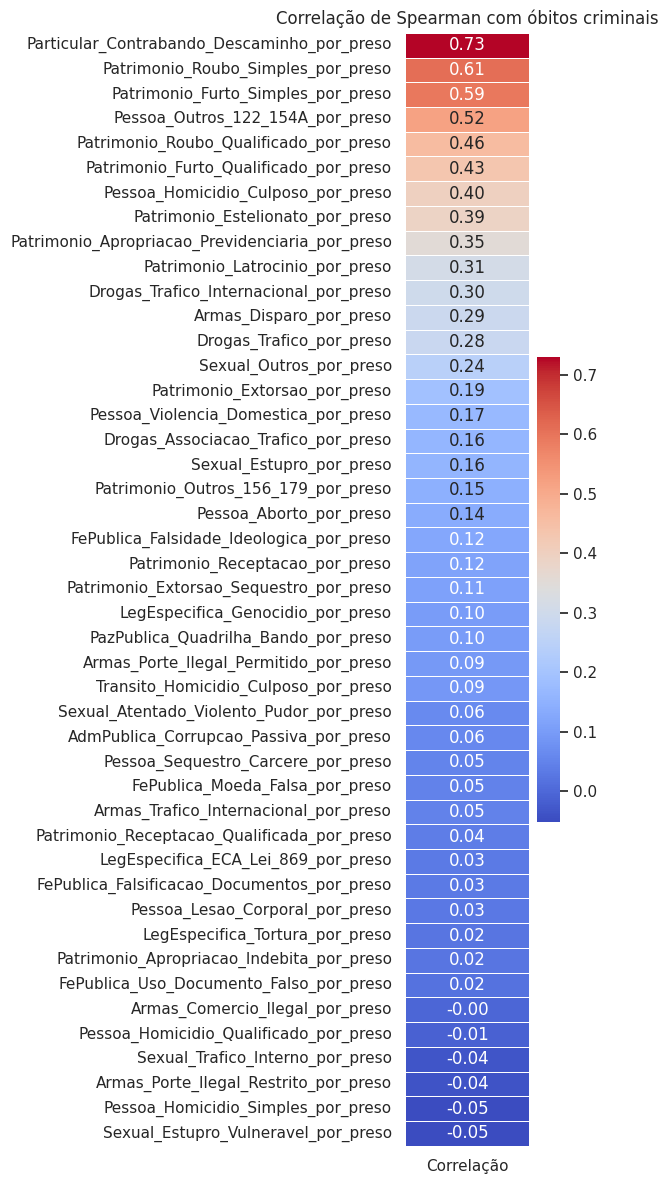

In [ ]:
plt.figure(figsize=(6, 12))

# Criação de um heatmap para representar as correlações de Spearman
sns.heatmap(spearman_obitos.to_frame(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar=True,
            xticklabels=['Correlação'])

plt.title('Correlação de Spearman com óbitos criminais')
plt.tight_layout()
plt.show()

A análise indicou que certos crimes apresentam associação mais forte com a ocorrência de óbitos criminais no sistema prisional.

## Testes de Hipótese

#### Pergunta 1: "É possível prever o número de pessoas privadas de liberdade em um estado nos próximos anos a partir do histórico da população carcerária e da disponibilidade de vagas no sistema prisional?"
Hipótese para investigar
Será que a capacidade dos presídios tem um efeito estatisticamente significativo na quantidade de presos ao longo do tempo?

Hipótese Nula
H0: Não há correlação significativa entre a capacidade disponível e o número de presos.

H1: Há correlação significativa entre a capacidade disponível e o número de presos.

In [48]:
populacao = df_uf_ano['5.1 Quantidade de pessoas privadas de liberdade por faixa etária | Total']
capacidade = df_uf_ano['Capacidade Total']

# Remove NaNs simultaneamente
mask = ~populacao.isna() & ~capacidade.isna()
t_stat, p_val = ttest_rel(populacao[mask], capacidade[mask])

print("Estatística do teste t:", t_stat)
print("Valor-p:", p_val)

if p_val < 0.05:
    print("Rejeitamos a hipótese nula: a população carcerária média é significativamente maior que a capacidade média.")
else:
    print("Não rejeitamos a hipótese nula: não há evidência significativa de que a população carcerária seja maior que a capacidade.")


NameError: name 'df_uf_ano' is not defined

In [ ]:
def intervalo_confianca(dados, nivel=0.95):
    n = len(dados)
    media = np.mean(dados)
    erro = stats.sem(dados)
    margem = erro * stats.t.ppf((1 + nivel) / 2., n-1)
    return media - margem, media + margem

ic_pop = intervalo_confianca(populacao[mask])
ic_cap = intervalo_confianca(capacidade[mask])

print(f"Intervalo de confiança (95%) para a média da população carcerária: {ic_pop}")
print(f"Intervalo de confiança (95%) para a média da capacidade do sistema: {ic_cap}")

---------
  
#### Pergunta 2: "É possível relacionar a quantidade de óbitos naturais/por motivos de saúde com a qualidade da área médica das prisões?"

Hipóteses:
H0 (Hipótese nula): Não há diferença significativa entre a média de óbitos em prisões com baixa e alta qualidade médica.

H1 (Hipótese alternativa): Há diferença significativa entre as médias de óbitos em prisões com baixa e alta qualidade médica.

In [49]:
dfp2_test = dfp2.dropna(subset=['score_qualidade_saude', 'obitos_doenca']).copy()

# Dividir grupos por mediana do índice
mediana = dfp2_test['score_qualidade_saude'].median()
grupo_baixo = dfp2_test[dfp2_test['score_qualidade_saude'] <= mediana]['obitos_doenca']
grupo_alto = dfp2_test[dfp2_test['score_qualidade_saude'] > mediana]['obitos_doenca']

# Teste t de duas amostras independentes (amostras não pareadas)
t_stat, p_val = stats.ttest_ind(grupo_baixo, grupo_alto, equal_var=False)

print("Estatística do teste t:", t_stat)
print("Valor-p:", p_val)

if p_val < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa nos óbitos entre prisões com qualidade médica alta e baixa.")
else:
    print("Não rejeitamos a hipótese nula: não há evidência significativa de diferença entre os grupos.")

Estatística do teste t: 11.948380638336051
Valor-p: 9.603743677247455e-33
Rejeitamos a hipótese nula: há diferença significativa nos óbitos entre prisões com qualidade médica alta e baixa.


In [50]:
def intervalo_confianca(dados, nivel=0.95):
    n = len(dados)
    media = np.mean(dados)
    erro = stats.sem(dados)
    margem = erro * stats.t.ppf((1 + nivel) / 2., n-1)
    return media - margem, media + margem

# Intervalos de confiança para os dois grupos
ic_baixo = intervalo_confianca(grupo_baixo)
ic_alto = intervalo_confianca(grupo_alto)

print(f"\nIntervalo de confiança (95%) para a média de óbitos - Qualidade BAIXA: {ic_baixo}")
print(f"Intervalo de confiança (95%) para a média de óbitos - Qualidade ALTA:  {ic_alto}")


Intervalo de confiança (95%) para a média de óbitos - Qualidade BAIXA: (np.float64(0.9051677230568415), np.float64(0.9873952469801647))
Intervalo de confiança (95%) para a média de óbitos - Qualidade ALTA:  (np.float64(0.39470033949440064), np.float64(0.5304518629647136))


--------
#### Pergunta 3: "Existe uma correlação entre a infraestrutura prisional e a oferta de serviços nas unidades prisionais com o percentual de presos envolvidos em programas de laborterapia e educação?"

-------
#### Pergunta 4: "Existe uma correlação entre o tipo de crime pelo qual os detentos foram condenados e a incidência de óbitos prisionais de natureza criminal?"  
Hipóteses:
Para cada tipo de crime C, testamos a seguinte hipótese:
- Hipótese nula (H0): Não existe correlação entre a proporção de presos por crime C e a proporção de óbitos criminais. H0: p = 0
- Hipótese alternativa (H1): Existe correlação entre a proporção de presos por crime C e a proporção de óbitos criminais. H1: p != 0


Como a distribuição dos dados não é normal, optou-se por usar coeficiente de correlação de Spearman para os testes de hipótese. Utilizou-se um nível de significância α=0,05.

In [ ]:
resultados = []

# Para cada tipo de crime, calcula a correlação de Spearman e o valor-p
for crime_col in colunas_proporcionais:
    rho, p_val = stats.spearmanr(
        dados_filtrados4_renomeados[crime_col],
        dados_filtrados4_renomeados['Obitos_Criminais_Total_por_preso']
    )

    # Avalia a hipótese nula
    decisao = 'Rejeitamos H0' if p_val < 0.05 else 'Não rejeitamos H0'

    resultados.append({
        'Crime': crime_col,
        'Correlação de Spearman (rho)': rho,
        'Valor-p': p_val,
        'Decisão': decisao
    })

    # Converte os resultados em DataFrame
    df_resultados = pd.DataFrame(resultados).sort_values(by='Correlação de Spearman (rho)', ascending=False)

    print(df_resultados)

                                Crime  Correlação de Spearman (rho)  \
0  Pessoa_Homicidio_Simples_por_preso                     -0.047678   

        Valor-p        Decisão  
0  1.803069e-08  Rejeitamos H0  
                                Crime  Correlação de Spearman (rho)  \
1  Pessoa_Homicidio_Culposo_por_preso                      0.398579   
0  Pessoa_Homicidio_Simples_por_preso                     -0.047678   

        Valor-p        Decisão  
1  0.000000e+00  Rejeitamos H0  
0  1.803069e-08  Rejeitamos H0  
                                    Crime  Correlação de Spearman (rho)  \
1      Pessoa_Homicidio_Culposo_por_preso                      0.398579   
2  Pessoa_Homicidio_Qualificado_por_preso                     -0.013452   
0      Pessoa_Homicidio_Simples_por_preso                     -0.047678   

        Valor-p            Decisão  
1  0.000000e+00      Rejeitamos H0  
2  1.123790e-01  Não rejeitamos H0  
0  1.803069e-08      Rejeitamos H0  
                             

## Resultados e Discussões

#### Pergunta 1



Por fim, para investigar se existe uma correlação entre o tipo de pena e a incidência de óbitos prisionais criminais foram analisados os dados relacionados e aplicados testes de hipótese com o coeficiente de correlação de Spearman. Os testes foram realizados individualmente para cada categoria de crime, considerando como hipótese nula a ausência de correlação entre a proporção de presos por crime e a taxa de óbitos criminais, e como hipótese alternativa a existência de uma correlação significativa.

Em grande parte dos crimes analisados, os valores de p encontrados foram menores que o nível de significância utilizado (α = 0,05), o que permitiu rejeitar a hipótese nula. Isso indica a presença de uma associação estatística entre o tipo de crime e a ocorrência de mortes por causas criminais no sistema prisional. Crimes como contrabando/descaminho, roubo simples e furto simples apresentaram coeficientes de correlação (rho) acima de 0,59, sugerindo que os detentos condenados por esses delitos podem estar mais expostos a situações de violência ou vulnerabilidade nas unidades prisionais. Por outro lado, em crimes como comércio ilegal de armas e homicídio qualificado não foi encontrada evidência estatística suficiente para afirmar a existência de correlação, já que os seus valores de p foram maiores do que o nível de significância adotado.   

É importante destacar que a correlação observada não implica causalidade. As associações observadas podem ser influenciadas por outros fatores não incluídos na análise, portanto, não é possível afirmar que unidades prisionais com maior proporção de detentos de determinados crimes terão uma maior taxa de óbitos criminais. Os resultados apontam apenas para a existência de indícios de associação, os quais podem orientar investigações mais profundas no futuro.

#### Pergunta 2

#### Pergunta 3

#### Pergunta 4